In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

def get_some_data():
    cols_to_use = ['Distance', 'Landsize', 'BuildingArea']
    data = pd.read_csv('./melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y
    

/Users/riyasharma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


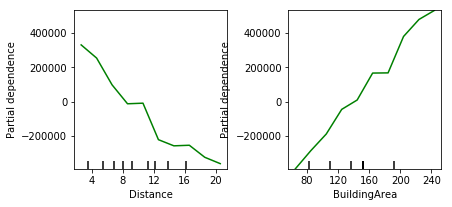

In [7]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

In [ ]:
#Some tips related to plot_partial_dependence:
#The features are the column numbers from the X array or dataframe that you wish to have plotted. 
#This starts to look bad beyond 2 or 3 variables. You could make repeated calls to plot 2 or 3 at a time.
#There are options to establish what points on the horizontal axis are plotted. 
#The simplest is grid_resolution which we use to determine how many different points are plotted. 
#These plots tend to look jagged as that value increases, because you will pick up lots of randomness or 
#noise in your model. It's best not to take the small or jagged fluctuations too literally.
#Smaller values of grid_resolution smooth this out. It's also much less of an issue for datasets with many rows.
#There is a function called partial_dependence to get the raw data making up this plot, 
#rather than making the visual plot itself. This is useful if you want to control how it 
#is visualized using a plotting package like Seaborn. With moderate effort, you could make much nicer looking plots.

/Users/riyasharma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
data = pd.read_csv('./train.csv')

y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

my_pipeline.fit(train_X, train_y)

predictions = my_pipeline.predict(test_X)

/Users/riyasharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/riyasharma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/riyasharma/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
